## 什么是决策树

* 决策树是对样本数据进行树形分类的过程，由节点和有向边组成。
* 节点分为内部节点和叶节点，每个内部节点表示一个特征或属性，叶节点表示类别。
* 从根节点开始，样本被分到不同的子节点中，再根据子节点的特征进一步划分。重复这个过程，直到所有样本都被归到某一个类别（叶节点）中。
<img src="imgs/jcs.png" width="500">

常用的决策树算法有ID3、C4.5、C5.0及CART（Classification And Regression Tree）。<br><br>
决策树作为最基础、最常见的监督学习模型，具有简单直观、解释性强的特点，常用于分类问题和回归问题，在市场营销和生物医药领域尤其受欢迎，因为树形结构于与销售、诊断等场景下的决策过程十分相似。


## 决策树的生成

<img src="imgs/scjcs.png" width="500">

准备工作
>明确自变量和因变量<br>
确定信息度量的方式：信息增益、信息增益比、基尼指数<br>
确定终止条件：纯度、记录条数、循环次数

选择特征
>得到当前待处理子集<br>
计算所有特征信息度量<br>
得到当前最佳分类特征

创建分支
>根据选中特征将当前记录分为不同分支，分支个数取决于算法

是否终止
>判断是否满足终止条件，满足则退出循环，不满足则继续递归调用

生成结果
>判断是否需要剪枝，需要则进行适当剪枝，不需要则保存最终结果

## ID3——最大信息增益
下面我们以ID3算法为例，来学习决定树的构建。首先，我们来学习几个概念：
##### 信息熵（entropy）
* 信息论之父，克劳德$\cdot$香农提出
* 描述信息的混论程度
* 取值范围是[0,1]，值越大，越混乱，不确定性越大
* 对于样本集合D，类别数为n，D的熵的计算公式：
$$H(D)=-\sum _{i=1}^np_i\log_2p_i$$
 $p_i$表示该分类出现的概率，式中对数一般取2为底，单位为比特。

##### 条件熵
* 某个特征A对于数据集D的条件熵的计算公式为：
$$ H(D|A)=\sum _{i=1}^n \frac{|D_i|}{|D|}H(D_i)
=\sum _{i=1}^n \frac{|D_i|}{|D|} \left(-\sum  _{i=1}^k \frac{|D_{ik}|}{|D_i|} \log_2 \frac{|D_{ik}|}{|D_i|} \right)$$
$D_i$表示$D$中特征$A$取第$i$个值的样本子集，$D_{ik}$表示$D_i$中属于第$k$类的样本子集。<br><br>
* 其实条件熵就是按一个新变量的每个值对原变量进行分类，然后在每一个小类里面计算一个小熵，再将每一个小熵乘以对应类别的概率，然后求和。

##### 信息增益（information gain）
* 信息是确定性增加
* 信息增益是从一个状态到另一个状态信息的变化值
* 信息增益越大，对确定性贡献越大
* 计算公式为：
$$g(D,A)=H(D)-H(D|A)$$

在刚才的例子中：
>总样本数5，不见的概率$\frac{3}{5}$，见的概率$\frac{2}{5}$,D的信息熵：
$$
H(D)=-\frac{3}{5}\log_2\frac{3}{5}-\frac{2}{5}\log_2\frac{2}{5}=0.971
$$<br>
年龄：老$\frac{1}{5}$，年轻$\frac{4}{5}$，年龄的条件熵：
$$
H(D|年龄)=\frac{1}{5}H(老)+\frac{4}{5}H(年轻)
=\frac{1}{5}(-1\log_21)+\frac{4}{5}(-\frac{2}{4}\log_2\frac{2}{4}-\frac{2}{4}\log_2\frac{2}{4})=0.8
$$<br>
长相：帅$\frac{1}{5}$，一般$\frac{3}{5}$，丑$\frac{1}{5}$，长相的条件熵：
$$
H(D|长相)=\frac{1}{5}H(帅)+\frac{3}{5}H(一般)+\frac{1}{5}H(丑)
=\frac{1}{5}(-1\log_21)+\frac{3}{5}(-\frac{2}{3}\log_2\frac{2}{3}-\frac{1}{3}\log_2\frac{1}{3})+\frac{1}{5}(-1\log_21)=0.551
$$<br>
工资：高$\frac{3}{5}$，中等$\frac{1}{5}$，低$\frac{1}{5}$，工资的条件熵：
$$
H(D|工资)=\frac{3}{5}H(高)+\frac{1}{5}H(中等)+\frac{1}{5}H(低)
=\frac{3}{5}(-\frac{2}{3}log_2\frac{2}{3}-\frac{1}{3}log_2\frac{1}{3})+\frac{1}{5}\times0+\frac{1}{5}\times0=0.551
$$
程序员：是$\frac{2}{5}$，不是$\frac{3}{5}$，程序员的条件熵：
$$
H(D|程序员)=\frac{2}{5}H(是)+\frac{3}{5}H(不是)
=\frac{2}{5}(-\frac{2}{2}log_2\frac{2}{2})+\frac{3}{5}(-\frac{3}{3}log_2\frac{3}{3})=0
$$<br>
所以，各个特征的信息增益为：<br>
$g(D|年龄)=H(D)-H(D|年龄)=0.971-0.8=0.171$ <br>
$g(D|长相)=H(D)-H(D|长相)=0.971-0.551=0.420$<br>
$ g(D|工资)=H(D)-H(D|工资)=0.971-0.551=0.420 $<br>
$g(D|程序员)=H(D)-H(D|程序员)=0.971-0=0.971$

显然“程序员”的信息增益最大，所以选择它作为决策树的根节点。
<img src="imgs/jcs1.png" width="500">
而经过此逆天特征后，各分支的经验熵均为$-1 \times \log_21=0$，完成了决策树生长。当然，实际应用中，决策树往往不能通过一个特征就完成构建，需要在经验熵不为0的分支中继续生长。

In [1]:
import math
#?math.log
print(- 3/5 * math.log(3/5,2) - 2/5 * math.log(2/5,2))
a = - 2/3 * math.log(2/3,2)- 1/3 * math.log(1/3,2)
print(a * 3/5)

0.9709505944546686
0.5509775004326938


## C4.5——最大信息增益率

* 信息增益率定义为：
$$g_R(D,A)=\frac{g(D,A)}{H_A(D)}$$
* 其中
$$ H_A(D)=-\sum_{i=1}^n\frac{|D_i|}{|D|} \log_2\frac{|D_i|}{|D|}$$
叫做数据集D关于A的取值熵。

现在我们来计算上例中每个特征的取值熵：
> $$ H_{年龄}(D)=-\frac{1}{5}log_2\frac{1}{5}-\frac{4}{5}log_2\frac{4}{5}=0.722$$
$$ H_{长相}(D)=-\frac{1}{5}log_2\frac{1}{5}-\frac{3}{5}log_2\frac{3}{5}-\frac{1}{5}log_2\frac{1}{5}=1.371$$
$$ H_{工资}(D)=-\frac{3}{5}log_2\frac{3}{5}-\frac{1}{5}log_2\frac{1}{5}-\frac{1}{5}log_2\frac{1}{5}=1.371$$
$$ H_{程序员}(D)=-\frac{3}{5}log_2\frac{3}{5}-\frac{2}{5}log_2\frac{2}{5}=0.971$$<br>
所以，各个特征的信息增益率为：<br>
$g_R(D,年龄)=\frac{0.171}{0.722}=0.236$<br>
$g_R(D,长相)=\frac{0.420}{1.371}=0.402$<br>
$g_R(D,工资)=\frac{0.420}{1.371}=0.402$<br>
$g_R(D,程序员)=\frac{0.971}{0.971}=1$<br>

信息增益率最大的依然是“程序员”，但是对比信息增益，“年龄”对应的指标上升了，“长相”“工资”对应的指标有所下降。

In [5]:
print(- 1/5 * math.log(1/5,2) - 4/5 * math.log(4/5,2))
print(- 1/5 * math.log(1/5,2) - 3/5 * math.log(3/5,2)- 1/5 * math.log(1/5,2))
print(- 3/5 * math.log(3/5,2) - 2/5 * math.log(2/5,2))

0.7219280948873623
1.3709505944546687
0.9709505944546686


## CART——最小基尼指数

* Gini描述的是数据的纯度，与信息熵含义类似。
* 值越大，不确定性越大
* 公式为：
$$Gini(D)=1-\sum_{i=1}^np_i^2$$
* 特征A的Gini指数定义为：
$$Gini(D|A)=\sum_{i=1}^n \frac{|D_i|}{|D|}Gini(D_i)$$

CART每次迭代时选择基尼指数最小的特征及其对应的切分点进行分类，不过与ID3、C4.5不同的是，CART是一颗二叉树，每次将数据按特征A的取值切成两份，分别进入左右子树。
解释一下就是：
> 数据集D中A若为离散特征，则根据A的某一可能值a将D分为$D_1$与$D_2$<br><br>
$$D_1=\{D|A=a\}\,\,\,D_2=\{D|A \neq a\}$$<br>
$$Gini(D|A)=\frac{|D_1|}{|D|}Gini(D_1) +\frac{|D_2|}{|D|}Gini(D_2) $$

现在，我们来计算各个特征的基尼指数：
>Gini(D|年龄=老)=$\frac{1}{5}(1-1)+\frac{4}{5}(1-(\frac{2}{4})^2-(\frac{2}{4})^2)=0.4$<br>
Gini(D|年龄=年轻)=$\frac{4}{5}(1-(\frac{2}{4})^2-(\frac{2}{4})^2)+\frac{1}{5}(1-1)=0.4$<br>
Gini(D|长相=帅)=$\frac{1}{5}(1-1)+\frac{4}{5}(1-(\frac{2}{4})^2-(\frac{2}{4})^2)=0.4$<br>
Gini(D|长相=丑)=$\frac{1}{5}(1-1)+\frac{4}{5}(1-(\frac{2}{4})^2-(\frac{2}{4})^2)=0.4$<br>
Gini(D|长相=一般)=$\frac{3}{5}(1-(\frac{2}{3})^2-(\frac{1}{3})^2)+\frac{2}{5}(1-(\frac{2}{2})^2)=0.267$<br>
Gini(D|工资=高)=$\frac{3}{5}(1-(\frac{2}{3})^2-(\frac{1}{3})^2)+\frac{2}{5}(1-(\frac{1}{2})^2-(\frac{1}{2})^2)=0.467$<br>
Gini(D|工资=中等)=$\frac{1}{5}(1-1)+\frac{4}{5}(1-(\frac{1}{4})^2-(\frac{3}{4})^2)=0.3$<br>
Gini(D|工资=低)=$\frac{1}{5}(1-1)+\frac{4}{5}(1-(\frac{2}{4})^2-(\frac{2}{4})^2)=0.4$<br>
Gini(D|程序员=是)=$\frac{2}{5}(1-1)+\frac{3}{5}(1-1)=0$<br>
Gini(D|程序员=不是)=$\frac{3}{5}(1-1)+\frac{2}{5}(1-1)=0$

我们很快发现特征“程序员”的Gini指数最小值为0，所以“程序员”作为最优特征，“程序员=是”为最优切分点。按照这种切分，从根节点会直接产生两个叶节点，基尼系数降为0，完成决策树生长。

## 几种算法的总结

### ID3系列

#### ID3（Iterative Dichotomiser3）
* 核心是信息熵、根据信息增益决定树的节点
* 分类是多叉树
* 缺点：
    + 信息度量不合理，倾向于选择取值多的字段
    + 输入类型单一，只支持离散型
    + 不做剪枝，容易过拟合
    
#### C4.5（Classifier 4.5）
对比ID3有以下改进：
* 用信息增益率代替信息增益
* 能对连续属性进行离散化、对缺失数据进行处理
* 悲观剪枝法

#### C5.0（Classifier 5.0）
对比C4.5有以下改进：
* 使用了Boosting（集成学习的一种方法）

### CART
* 核心是基尼指数
* 分类是二叉树
* 支持连续值和离散值
* 代价复杂度剪枝
* 支持回归，可预测连续值

## 决策树剪枝
为了避免过拟合（在测试集表现得很差），我们需要对完全生长的决策树进行修枝，减掉一些次要属性，提高模型的泛化能力。常用的方法有两种：

* 预剪枝（Pre-Pruning）：在生成决策树的过程中提前停止树的增长
    + 当树到达一定深度的时候，停止树的生长
    + 当到达当前节点的样本数量大于某个阈值的时候，停止树的生长
    + 计算每次分裂对测试集的准确度提升，当小于某个阈值的时候，停止树的生长
    + 优点：思想直接、算法简单、效率高、适合解决大规模问题
    + 缺点：准确的停止树的生长需要经验判断、有欠拟合的风险
    
    
* 后剪枝（Post-Pruning）：在已生成的过拟合的决策树上进行剪枝
    + 核心思想：从“发育”完全的决策树的底层向上计算是否剪枝。剪枝是将子树删除，用一个叶节点代替，该节点的类型按照多数投票的原则判断。也可以通过在测试集上的准确率进行判断，如果剪枝后准确率有所提升则进行剪枝。
    + 常见后剪枝算法：
        - 错误率降低剪枝（Reduced Error Pruning,REP）
        - 悲观剪枝（Pessimistic Error Pruning,PEP）
        - 代价复杂度剪枝（Cost Complexity Pruning,CCP）
        - 最小误差剪枝（Minimum Error Pruning,MEP）
        - ……
    + 优点：泛化能力更强
    + 缺点：时间开销更大

## 集成学习（Ensemble Learning）

前面我们学习的算法都是一种单一的模型，有时候可能单一模型的表现可能并不理想。集成学习的思想就如同贤明的君王，听取众谋臣的建议，最后综合考虑，得出最终决策。
* 集成学习：针对同一数据集，用多种分类器训练，汇总得出最终结果。这其中每个单独的分类器称为基分类器。
* 主要分为两种：
    + Bagging（Bootstrap Aggregating）
        - 有放回抽样构建多个子集
        - 训练多个分类器
        - 训练是并行的
        - 最终结果由各分类器结果投票得出
        - 代表算法：随机森林（Random Forest,RF）
        - <img src="imgs/bagging.png" width="500">
    + Boosting
        - 重复使用一类分类器来修改训练集
        - 每次训练后根据结果调整样本的权重
        - 训练是串行的
        - 每个分类器加权后的线性组合为最终结果
        - 代表算法：自适应元算法（Adaptive boosing,Adaboost）、梯度提升决策树（Gradient Boosting Decision Tree,GBDT）
        - <img src="imgs/boosting.png" width="550">

一句话总结就是——<span style="color:red;">“三个臭皮匠，顶个诸葛亮”</span>


## 决策树的实现

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}


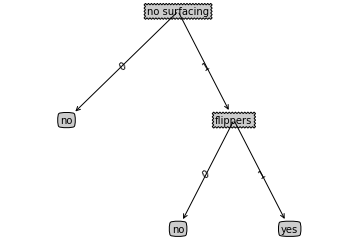

In [3]:
# 计算给定数据集的香农熵
from  math import log

def createDataSet():
    dataSet = [[1, 1, 'yes'],
               [1, 1, 'yes'],
               [1, 0, 'no'],
               [0, 1, 'no'],
               [0, 1, 'no']]
    labels = ['no surfacing', 'flippers']
    # change to discrete values
    return dataSet, labels

def calcShannonEnt(dataSet):
    numEntries = len(dataSet)  # 样本数
    labelCounts = {}   # 创建一个数据字典：key是最后一列的数值（即标签），value是属于该类别的样本个数
    for featVec in dataSet: # 遍历整个数据集，每次取一行
        currentLabel = featVec[-1]  #取该行最后一列的值
        if currentLabel not in labelCounts.keys(): labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1
        
    shannonEnt = 0.0  # 初始化信息熵
    for key in labelCounts:
        prob = float(labelCounts[key])/numEntries
        shannonEnt -= prob * log(prob,2) #log base 2  计算信息熵
    return shannonEnt

def splitDataSet(dataSet, axis, value):
    retDataSet = []
    for featVec in dataSet:
        if featVec[axis] == value:
            reducedFeatVec = featVec[:axis]  # chop out axis used for splitting
            reducedFeatVec.extend(featVec[axis + 1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet


def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0]) - 1  # the last column is used for the labels
    baseEntropy = calcShannonEnt(dataSet)
    bestInfoGain = 0.0;
    bestFeature = -1
    for i in range(numFeatures):  # iterate over all the features
        featList = [example[i] for example in dataSet]  # create a list of all the examples of this feature
        uniqueVals = set(featList)  # get a set of unique values
        newEntropy = 0.0
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value)
            prob = len(subDataSet) / float(len(dataSet))
            newEntropy += prob * calcShannonEnt(subDataSet)
        infoGain = baseEntropy - newEntropy  # calculate the info gain; ie reduction in entropy
        if (infoGain > bestInfoGain):  # compare this to the best gain so far
            bestInfoGain = infoGain  # if better than current best, set to best
            bestFeature = i
    return bestFeature  # returns an integer


def majorityCnt(classList):
    classCount = {}
    for vote in classList:
        if vote not in classCount.keys(): classCount[vote] = 0
        classCount[vote] += 1
    sortedClassCount = sorted(classCount.iteritems(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]


def createTree(dataSet, labels):
    classList = [example[-1] for example in dataSet]
    if classList.count(classList[0]) == len(classList):
        return classList[0]  # stop splitting when all of the classes are equal
    if len(dataSet[0]) == 1:  # stop splitting when there are no more features in dataSet
        return majorityCnt(classList)
    bestFeat = chooseBestFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
    myTree = {bestFeatLabel: {}}
    del (labels[bestFeat])
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    for value in uniqueVals:
        subLabels = labels[:]  # copy all of labels, so trees don't mess up existing labels
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value), subLabels)
    return myTree



## 下面是可视化决策树
import matplotlib.pyplot as plt

decisionNode = dict(boxstyle="sawtooth", fc="0.8")
leafNode = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")

def getNumLeafs(myTree):
    numLeafs = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[
                    key]).__name__ == 'dict':  # test to see if the nodes are dictonaires, if not they are leaf nodes
            numLeafs += getNumLeafs(secondDict[key])
        else:
            numLeafs += 1
    return numLeafs


def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[
                    key]).__name__ == 'dict':  # test to see if the nodes are dictonaires, if not they are leaf nodes
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:
            thisDepth = 1
        if thisDepth > maxDepth: maxDepth = thisDepth
    return maxDepth


def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt, xy=parentPt, xycoords='axes fraction',
                            xytext=centerPt, textcoords='axes fraction',
                            va="center", ha="center", bbox=nodeType, arrowprops=arrow_args)
    
    
def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0] - cntrPt[0]) / 2.0 + cntrPt[0]
    yMid = (parentPt[1] - cntrPt[1]) / 2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)


def plotTree(myTree, parentPt, nodeTxt):  # if the first key tells you what feat was split on
    numLeafs = getNumLeafs(myTree)  # this determines the x width of this tree
    depth = getTreeDepth(myTree)
    firstStr = list(myTree.keys())[0]  # the text label for this node should be this
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs)) / 2.0 / plotTree.totalW, plotTree.yOff)
    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0 / plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[
                    key]).__name__ == 'dict':  # test to see if the nodes are dictonaires, if not they are leaf nodes
            plotTree(secondDict[key], cntrPt, str(key))  # recursion
        else:  # it's a leaf node print the leaf node
            plotTree.xOff = plotTree.xOff + 1.0 / plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0 / plotTree.totalD
    
    
def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)  # no ticks
    # createPlot.ax1 = plt.subplot(111, frameon=False) #ticks for demo puropses
    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    plotTree.xOff = -0.5 / plotTree.totalW;
    plotTree.yOff = 1.0;
    plotTree(inTree, (0.5, 1.0), '')
    plt.show()
    
    
data,label=createDataSet()
# print(data)
tr=createTree(data,label)
print(tr)

createPlot(tr)